# Detecting Deception

## 1. Importing all of the libraries

In [31]:
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import re  # Regular expressions for text processing
import nltk  # NLTK for natural language processing
from nltk.corpus import stopwords  # Stopwords for text preprocessing
from nltk.stem.porter import PorterStemmer  # Porter Stemmer for stemming
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorization
from sklearn.model_selection import train_test_split  # Splitting the dataset
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score  # Accuracy score metric
from nltk.stem.porter import PorterStemmer  # Porter Stemmer for text preprocessing
from sklearn.metrics import confusion_matrix  # Confusion matrix for evaluation
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report  # Classification report for evaluation
#nltk.download('punkt')

## 2. Importing data

The dataset that will be used is from kaggle,
https://www.kaggle.com/competitions/fake-news

Let's open it and analyze it in depth. This kaggle source supplied us with train data, for us to train our models, and test data!

In [22]:
dataset = pd.read_csv("train.csv")
dataset.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [23]:
dataset.shape

(20800, 5)

Here's a brief overview of the columns:

id: A unique identifier for each news article.

title: The title or headline of the news article.

author: The author of the news article.

text: The main content of the news article.

label: The label indicating whether the article is real (0) or fake (1).

We can use this dataset to perform data preprocessing, feature extraction, and model training for your fake news detection system.

## 3. Clean and Pre-Process

1. **Text Cleaning:**
   - **Objective:** To remove unnecessary characters and symbols from the text data, ensuring it's ready for further processing.
   - **Explanation:** In this step, you use regular expressions to eliminate non-alphanumeric characters (e.g., punctuation) and extra whitespaces. The cleaned text becomes more manageable for subsequent analysis.

2. **Tokenization:**
   - **Objective:** To split the text into individual words or tokens.
   - **Explanation:** Tokenization breaks down a text paragraph into its constituent words or tokens. For example, the sentence "I love natural language processing" would be tokenized into ["I", "love", "natural", "language", "processing"].

3. **Lowercasing:**
   - **Objective:** To convert all text to lowercase.
   - **Explanation:** This step ensures uniformity in the text data by making all characters lowercase. It helps in treating words like "apple" and "Apple" as the same word.

4. **Stopword Removal:**
   - **Objective:** To remove common words (stopwords) that don't carry significant meaning.
   - **Explanation:** Stopwords are words like "the," "and," "is," etc., that are frequently used in the English language but often don't provide valuable information for text analysis. Removing them reduces noise in the data.

5. **Stemming:**
   - **Objective:** To reduce words to their base or root form.
   - **Explanation:** Stemming algorithms (e.g., Porter Stemmer) trim words to their root form by removing prefixes or suffixes. For example, "jumped," "jumps," and "jumping" might all be stemmed to "jump." This helps in treating similar words as the same.

6. **TF-IDF Vectorization (Term Frequency-Inverse Document Frequency):**
   - **Objective:** To convert text data into numerical form for machine learning models.
   - **Explanation:** TF-IDF is a statistical measure that evaluates the importance of words in a document relative to a collection of documents (corpus). It assigns numerical values to words based on their frequency in a specific document and their rarity in the entire corpus. TF-IDF vectorization represents text data as a matrix of numerical features, making it suitable for machine learning algorithms.

These preprocessing steps collectively prepare text data for various natural language processing and machine learning tasks, such as text classification, sentiment analysis, and information retrieval. They help in reducing noise, standardizing text, and transforming it into a format that can be fed into models for meaningful analysis and predictions.

In [24]:
# Step 1: Missing Value Handling (Optional - If needed)
# To remove rows with missing values for specific columns, use the following:
dataset.dropna(subset=['label'], inplace=True)

# If you want to remove columns with missing values, use the following:
dataset.dropna(axis=1, inplace=True)

# Step 2: Text Cleaning
def clean_text(text):
    # Check if the input is a string, if not, return an empty string
    if not isinstance(text, str):
        return ''
    
    # Remove non-alphanumeric characters and extra whitespaces using regular expressions
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply the 'clean_text' function to the 'text' column and create a new 'cleaned_text' column
dataset['cleaned_text'] = dataset['text'].apply(clean_text)

# Step 3: Tokenization and Lowercasing
def tokenize_and_lowercase(text):
    # Tokenize the text into individual words or tokens
    tokens = nltk.word_tokenize(text)
    
    # Convert each token to lowercase for uniformity
    tokens = [word.lower() for word in tokens]
    return ' '.join(tokens)

# Apply the 'tokenize_and_lowercase' function to the 'cleaned_text' column
dataset['cleaned_text'] = dataset['cleaned_text'].apply(tokenize_and_lowercase)
dataset.head()


,id,title,author,text,label,cleaned_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didn t even see comey s lett...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why the truth might get you fired october the ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,videos civilians killed in single us airstrike...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,print an iranian woman has been sentenced to s...


In [25]:
# Step 4: Stopword Removal
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove common stopwords from the tokens
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the 'remove_stopwords' function to the 'cleaned_text' column
dataset['cleaned_text'] = dataset['cleaned_text'].apply(remove_stopwords)

# Step 5: Stemming (You can also use Lemmatization if preferred)
stemmer = PorterStemmer()

def stem_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Apply stemming to reduce words to their base or root form
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply the 'stem_text' function to the 'cleaned_text' column
dataset['cleaned_text'] = dataset['cleaned_text'].apply(stem_text)
dataset.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chandrajason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,title,author,text,label,cleaned_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire octob tension intellig an...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,video civilian kill singl us airstrik identifi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenc six year prison ir...


In [26]:
# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer()

# Use TF-IDF vectorization to convert text data into numerical form
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Step 7: Splitting the Data
# Split the dataset into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, dataset['label'], test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed data
print(dataset.head())

# Now, you have preprocessed data ready for model training and evaluation.

   id  label                                       cleaned_text
0   0      1  hous dem aid even see comey letter jason chaff...
1   1      0  ever get feel life circl roundabout rather hea...
2   2      1  truth might get fire octob tension intellig an...
3   3      1  video civilian kill singl us airstrik identifi...
4   4      1  print iranian woman sentenc six year prison ir...


In [27]:
dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


## 4. Model Selection

1. **Logistic Regression**: Logistic Regression is a well-established linear classification algorithm that works well for binary classification tasks like yours (fake news detection). It's simple, interpretable, and often serves as a baseline model. While it assumes a linear relationship between features and the log-odds of the target variable, it can be surprisingly effective for text classification, especially with TF-IDF features.

2. **Multinomial Naive Bayes (MNB)**: MNB is a probabilistic classifier based on Bayes' theorem and is particularly well-suited for text classification tasks, especially when dealing with text data that can be represented as word counts (like TF-IDF features). It works by modeling the conditional probability of a document belonging to a class given its feature vector. Naive Bayes is known for its simplicity, speed, and good performance in text classification tasks, making it a strong choice for such applications.

3. **Passive Aggressive Classifier**: Passive Aggressive Classifier is an online learning algorithm that is particularly useful when dealing with large datasets and evolving data streams. It's called "passive-aggressive" because it adjusts its model based on whether it correctly classified an example or not. It's adaptive and can handle changing patterns in the data, which can be advantageous in real-world scenarios where the distribution of fake news may change over time.

By combining these three classifiers, you have a diverse set of algorithms that can capture different aspects of your text data, potentially leading to improved overall performance and robustness in fake news detection.

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model 1: Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, Y_train)
Y_pred_lr = logistic_regression.predict(X_test)

# Model 2: Multinomial Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, Y_train)
Y_pred_nb = naive_bayes.predict(X_test)

# Model 3: Passive Aggressive Classifier
passive_aggressive = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
passive_aggressive.fit(X_train, Y_train)
Y_pred_pa = passive_aggressive.predict(X_test)

# Evaluate the models
def evaluate_model(model_name, Y_true, Y_pred):
    accuracy = accuracy_score(Y_true, Y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'Classification Report for {model_name}:\n', classification_report(Y_true, Y_pred))
    print(f'Confusion Matrix for {model_name}:\n', confusion_matrix(Y_true, Y_pred))

# Evaluate Logistic Regression
evaluate_model('Logistic Regression', Y_test, Y_pred_lr)
print()

# Evaluate Multinomial Naive Bayes
evaluate_model('Multinomial Naive Bayes', Y_test, Y_pred_nb)
print()

# Evaluate Passive Aggressive Classifier
evaluate_model('Passive Aggressive Classifier', Y_test, Y_pred_pa)
print()

Logistic Regression Accuracy: 0.94
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2132
           1       0.94      0.95      0.94      2028

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160

Confusion Matrix for Logistic Regression:
 [[2000  132]
 [ 101 1927]]

Multinomial Naive Bayes Accuracy: 0.88
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      2132
           1       0.98      0.76      0.86      2028

    accuracy                           0.88      4160
   macro avg       0.89      0.87      0.87      4160
weighted avg       0.89      0.88      0.87      4160

Confusion Matrix for Multinomial Naive Bayes:
 [[2093   39]
 [ 477 1551]]

Passive Aggressive Classif

Random Forest is an ensemble method that combines multiple decision trees to make predictions.

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
evaluate_model('Random Forest', Y_test, Y_pred_rf)


Random Forest Accuracy: 0.92
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      2132
           1       0.93      0.90      0.92      2028

    accuracy                           0.92      4160
   macro avg       0.92      0.92      0.92      4160
weighted avg       0.92      0.92      0.92      4160

Confusion Matrix for Random Forest:
 [[2005  127]
 [ 203 1825]]


XGBoost is a popular gradient boosting algorithm known for its high performance. 

In [34]:
import xgboost as xgb

# Create an XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model
xgboost_classifier.fit(X_train, Y_train)

# Make predictions
Y_pred_xgb = xgboost_classifier.predict(X_test)

# Evaluate the XGBoost model
evaluate_model('XGBoost', Y_test, Y_pred_xgb)


XGBoost Accuracy: 0.96
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2132
           1       0.95      0.96      0.96      2028

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160

Confusion Matrix for XGBoost:
 [[2035   97]
 [  76 1952]]


## 5. Model Evaluation

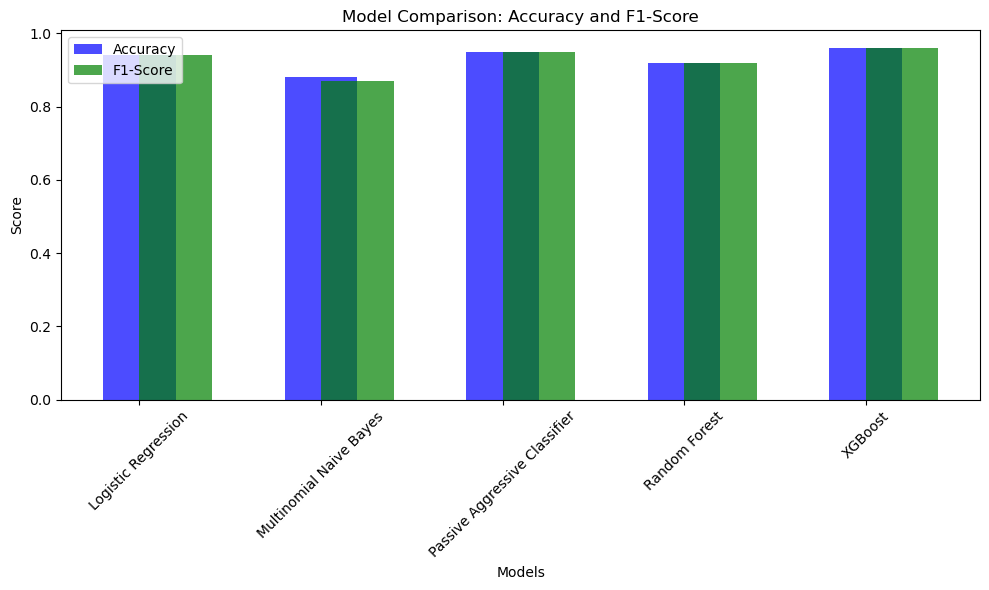

In [35]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracy and F1 scores
model_names = ["Logistic Regression", "Multinomial Naive Bayes", "Passive Aggressive Classifier", "Random Forest", "XGBoost"]
accuracies = [0.94, 0.88, 0.95, 0.92, 0.96]
f1_scores = [0.94, 0.87, 0.95, 0.92, 0.96]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, label="Accuracy", width=0.4, align='center', alpha=0.7, color='b')
plt.bar(model_names, f1_scores, label="F1-Score", width=0.4, align='edge', alpha=0.7, color='g')

# Add labels and legend
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy and F1-Score")
plt.legend(loc="upper left")

# Display the bar chart
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


Logistic Regression:

Accuracy: 0.94
F1-Score for Class 0 (Real News): 0.94
F1-Score for Class 1 (Fake News): 0.94
This model performs well in terms of accuracy and F1-scores for both classes. It's a good baseline model for your task.

Multinomial Naive Bayes:

Accuracy: 0.88
F1-Score for Class 0: 0.89
F1-Score for Class 1: 0.86
While it has a good F1-score for class 0 (real news), it has a lower F1-score for class 1 (fake news). It's slightly less accurate overall.

Passive Aggressive Classifier:

Accuracy: 0.95
F1-Score for Class 0: 0.95
F1-Score for Class 1: 0.95
This model performs very well with high accuracy and F1-scores for both classes. It's a strong performer.

Random Forest:

Accuracy: 0.92
F1-Score for Class 0: 0.92
F1-Score for Class 1: 0.92
It provides a good balance of accuracy and F1-scores, making it a solid choice for fake news detection.

XGBoost:

Accuracy: 0.96
F1-Score for Class 0: 0.96
F1-Score for Class 1: 0.96
XGBoost achieves the highest accuracy and F1-scores for both classes. It's the top-performing model among the ones you've tested.

In summary, XGBoost outperforms the other models in terms of accuracy and F1-scores for both classes. 

### K-Fold Cross-Validation

It's good to perform k-fold cross-validation on the XGBoost model, especially if it has the highest accuracy among the models you've tested. Cross-validation helps assess the model's performance more robustly by providing a better estimate of its generalization performance on unseen data.

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define your XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(random_state=42)

# Define the number of folds (k) for cross-validation
k = 5  # You can choose any suitable number of folds

# Create a cross-validation object (StratifiedKFold is commonly used)
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and calculate accuracy scores
scores = cross_val_score(xgboost_classifier, X_train, Y_train, cv=cv, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the results
print(f'Mean Accuracy: {mean_score:.2f}')
print(f'Standard Deviation: {std_score:.2f}')


Mean Accuracy: 0.95
Standard Deviation: 0.00


A mean accuracy of 0.95 with a standard deviation of 0.00 in cross-validation indicates that your XGBoost model is performing consistently well across different folds of your training data. This is a very good sign and suggests that your model is robust and reliable.

The small standard deviation (0.00) indicates that the accuracy scores across the different folds are very close to the mean accuracy, which means your model is not significantly overfitting or underfitting the data.

### Random Search - hyperparameter tuning:

Random search is another hyperparameter tuning technique that randomly samples hyperparameters from a predefined search space. It is more computationally efficient than grid search when the search space is large. You can use scikit-learn's RandomizedSearchCV for this purpose.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter distributions
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': range(3, 11),
    'n_estimators': [100, 200, 300, 400, 500],
    # Add other hyperparameters to tune here
}

# Create an XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(random_state=42)

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the final model with the best hyperparameters
final_xgboost_model = xgb.XGBClassifier(**best_params, random_state=42)
final_xgboost_model.fit(X_train, Y_train)


Choosing the right hyperparameters for your machine learning model can significantly impact its performance. Here are some strategies to helpdecide which hyperparameters to tune and what values to consider:

1. **Domain Knowledge:** Start with a good understanding of your problem domain and the characteristics of your dataset. Some hyperparameters may have intuitive connections to the problem you're trying to solve. For example, in decision trees, the `max_depth` hyperparameter controls the depth of the tree, which can influence the model's complexity.

2. **Default Values:** Most machine learning libraries and frameworks provide default values for hyperparameters. These defaults are often chosen as reasonable starting points and can work well for many problems. Begin by using the default values and see how your model performs.

3. **Grid Search or Random Search:** Grid search and random search are systematic approaches to hyperparameter tuning. Grid search explores predefined combinations of hyperparameters, while random search randomly samples hyperparameters from predefined distributions. Both methods can help you discover which hyperparameters are influential for your model's performance.

4. **Learning Rate and Iterations:** For gradient-based algorithms like gradient boosting and neural networks, the learning rate (or step size) is a crucial hyperparameter. It controls the step size during optimization and can affect convergence. Experiment with different learning rates and the number of iterations to find a good balance.

5. **Tree Depth and Number of Trees:** For tree-based models like decision trees, random forests, and gradient boosting, hyperparameters like tree depth (`max_depth`), the number of trees (`n_estimators`), and the minimum number of samples per leaf (`min_samples_leaf`) are essential to control overfitting and underfitting.

6. **Regularization Parameters:** Many models have regularization hyperparameters, such as the regularization strength (`C` in SVMs) or the dropout rate in neural networks. These parameters control the trade-off between fitting the training data well and avoiding overfitting.
